<a href="https://colab.research.google.com/github/yogithamekala/handson_10-17/blob/main/handson_10_17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import necessary Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score, classification_report

Load the dataset

In [2]:
from google.colab import files
uploaded = files.upload()  # Upload your 'job_market_data.csv'

df = pd.read_csv('/content/employee_attrition_test.csv')

Saving employee_attrition_test.csv to employee_attrition_test (1).csv


In [4]:
# Inspect the dataset structure
df.head()  # Display the first 5 rows

# Display the columns in the dataframe
print(df.columns)

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


In [23]:
# Checking DataFrame columns
print("Columns in DataFrame:", df.columns)

# Example of accessing the Date column
if 'Date' in df.columns:
    # Proceed with your operation that requires the 'Date' column
    date_column = df['Date']
else:
    print("Column 'Date' not found in DataFrame.")

Columns in DataFrame: Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')
Column 'Date' not found in DataFrame.


In [11]:
# Check for NaN values in the dataset
print("NaN values in dataset:", df.isnull().sum())

NaN values in dataset: Age                         55
BusinessTravel               5
DailyRate                   14
Department                   0
DistanceFromHome            54
Education                    0
EducationField               0
EmployeeCount                0
EmployeeNumber               0
EnvironmentSatisfaction      0
Gender                       0
HourlyRate                   0
JobInvolvement               0
JobLevel                     0
JobRole                      0
JobSatisfaction              0
MaritalStatus                3
MonthlyIncome                0
MonthlyRate                  0
NumCompaniesWorked           0
Over18                       0
OverTime                     0
PercentSalaryHike            0
PerformanceRating            0
RelationshipSatisfaction     0
StandardHours                0
StockOptionLevel             0
TotalWorkingYears            0
TrainingTimesLastYear        0
WorkLifeBalance              0
YearsAtCompany               0
YearsInCurrentRo

In [13]:
import numpy as np
import pandas as pd

# Assuming df is your DataFrame
# Check for infinite values in only numeric columns
numeric_df = df.select_dtypes(include=[np.number])  # Select only numeric columns
infinite_values = np.isinf(numeric_df).sum()  # Check for infinite values
print("Infinite values in numeric dataset:", infinite_values)

# Drop rows with NaN values
df_cleaned = df.dropna()

# Drop rows with infinite values
# Creating a mask for infinite values
mask_inf = df_cleaned.isin([np.inf, -np.inf]).any(axis=1)
df_cleaned = df_cleaned[~mask_inf]  # Keep only rows that are not infinite

# Now check if the cleaning was successful
print("DataFrame shape after cleaning:", df_cleaned.shape)

Infinite values in numeric dataset: Age                         0
DailyRate                   0
DistanceFromHome            0
Education                   0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobSatisfaction             0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64
DataFrame shape after cleaning: (324, 34)


In [14]:
# Convert categorical variables to dummy/indicator variables
df_encoded = pd.get_dummies(df_cleaned, drop_first=True)

# Define features and target again
X = df_encoded.drop('JobSatisfaction', axis=1)  # Ensure 'JobSatisfaction' is your target column
y = df_encoded['JobSatisfaction']

# Train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (after ensuring no NaNs or infinite values)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Check the scaled data
print("Scaled features shape:", X_train_scaled.shape)

Scaled features shape: (259, 46)


In [6]:
# Step 1: Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_columns)

# Step 2: One-Hot Encoding for categorical columns
df_encoded = pd.get_dummies(df, drop_first=True)  # Convert categorical variables to numeric using one-hot encoding

# Step 3: Define features and target
X = df_encoded.drop('JobSatisfaction', axis=1)  # 'JobSatisfaction' as the target column
y = df_encoded['JobSatisfaction']

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Feature scaling (on the numerical columns after encoding)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Categorical columns: Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')


In [7]:
nn_model = Sequential([
    Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build the neural network model
nn_model = Sequential([
    Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification output
])

# Compile the model
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
nn_model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, validation_split=0.2)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - accuracy: 0.1489 - loss: 0.0878 - val_accuracy: 0.1923 - val_loss: -2.0582
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.1735 - loss: -2.6471 - val_accuracy: 0.1923 - val_loss: -4.6045
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2228 - loss: -5.1344 - val_accuracy: 0.1923 - val_loss: -7.4943
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.2287 - loss: -8.2804 - val_accuracy: 0.1923 - val_loss: -11.0834
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.2373 - loss: -12.2345 - val_accuracy: 0.1923 - val_loss: -15.6431
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.1763 - loss: -18.2862 - val_accuracy: 0.1923 - val_loss: -21.4228
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.1885 - loss: -24.9519 - val_accuracy: 0.1923 - val_loss: -28.5123
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.2015 - loss: -32.7959 - val_accuracy: 0.19

In [16]:
y_pred_nn = nn_model.predict(X_test_scaled)
y_pred_nn = (y_pred_nn > 0.5).astype(int).flatten()  # Convert to binary predictions

print(f"Neural Network Accuracy: {accuracy_score(y_test, y_pred_nn)}")
print("Classification Report:\n", classification_report(y_test, y_pred_nn))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Neural Network Accuracy: 0.26153846153846155
Classification Report:
               precision    recall  f1-score   support

           1       0.26      1.00      0.41        17
           2       0.00      0.00      0.00        10
           3       0.00      0.00      0.00        23
           4       0.00      0.00      0.00        15

    accuracy                           0.26        65
   macro avg       0.07      0.25      0.10        65
weighted avg       0.07      0.26      0.11        65



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [17]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [18]:
rf_preds = rf_model.predict(X_test_scaled)
nn_preds = (nn_model.predict(X_test_scaled) > 0.5).astype(int).flatten()

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [19]:
ensemble_preds = np.round((rf_preds + nn_preds) / 2)

In [20]:
print(f"Ensemble Model Accuracy: {accuracy_score(y_test, ensemble_preds)}")
print("Classification Report:\n", classification_report(y_test, ensemble_preds))

Ensemble Model Accuracy: 0.16923076923076924
Classification Report:
               precision    recall  f1-score   support

           1       0.25      0.06      0.10        17
           2       0.16      1.00      0.28        10
           3       0.00      0.00      0.00        23
           4       0.00      0.00      0.00        15

    accuracy                           0.17        65
   macro avg       0.10      0.26      0.09        65
weighted avg       0.09      0.17      0.07        65



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [24]:
# Checking DataFrame columns
print("Columns in DataFrame:", df.columns)

# Example of accessing the Date column
if 'Date' in df.columns:
    # Proceed with your operation that requires the 'Date' column
    date_column = df['Date']
else:
    print("Column 'Date' not found in DataFrame.")

Columns in DataFrame: Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')
Column 'Date' not found in DataFrame.


In [33]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Load your data
# df = pd.read_csv('your_data.csv')  # Uncomment and replace with your data source

# Step 1: Check the DataFrame
print(df.head())
print(df.dtypes)

# Step 2: Convert categorical variables using One-Hot Encoding or Label Encoding
# Using One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=['JobLevel'], drop_first=True)

# Or using Label Encoding (uncomment the following lines to use it instead)
# label_encoder = LabelEncoder()
# df['JobRole'] = label_encoder.fit_transform(df['JobRole'])

# Step 3: Scale the numerical features
scaler = MinMaxScaler(feature_range=(0, 1))


    Age BusinessTravel  DailyRate              Department  DistanceFromHome  \
0   NaN  Travel_Rarely      866.0                   Sales               NaN   
1  53.0  Travel_Rarely     1084.0  Research & Development              13.0   
2  24.0  Travel_Rarely      240.0         Human Resources              22.0   
3  45.0  Travel_Rarely     1339.0  Research & Development               7.0   
4  36.0  Travel_Rarely     1396.0  Research & Development               NaN   

   Education   EducationField  EmployeeCount  EmployeeNumber  \
0          3          Medical              1            1469   
1          2          Medical              1             250   
2          1  Human Resources              1            1714   
3          3    Life Sciences              1              86   
4          2    Life Sciences              1             304   

   EnvironmentSatisfaction  ... RelationshipSatisfaction  StandardHours  \
0                        4  ...                        4         

In [28]:
# Check the columns of the encoded DataFrame
print(df_encoded.columns)

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'JobRole_Sales Representative'],
      dtype='object')


In [40]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load your data
# df = pd.read_csv('/content/employee_attrition_test (1).csv')  # Uncomment and replace with your data source

# Check the DataFrame
print("Original DataFrame columns:", df.columns)

# Convert categorical variables using One-Hot Encoding or Label Encoding
df_encoded = pd.get_dummies(df, columns=['JobRole', 'JobLevel'], drop_first=True)

# Verify the columns after encoding
print("Columns in df_encoded:", df_encoded.columns.tolist())

# Check for numerical columns to scale
numeric_columns = df_encoded.select_dtypes(include=['float64', 'int64']).columns
print("Numerical columns to scale:", numeric_columns)

# Scale all numerical columns
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df_encoded[numeric_columns])

# Convert back to DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=numeric_columns)

# Display the scaled DataFrame
print(scaled_df.head())

Original DataFrame columns: Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')
Columns in df_encoded: ['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobSatisfaction', 'MaritalStatus', 'Monthl

In [35]:
def create_dataset(data, time_step=50):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i-time_step:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

time_step = 50
X, y = create_dataset(scaled_data, time_step)
X = X.reshape((X.shape[0], X.shape[1], 1))  # Reshape for LSTM input

In [36]:
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [41]:
!pip install flask-ngrok pyngrok joblib

In [43]:
joblib.dump(rf_model, 'rf_job_model.pkl')
nn_model.save('nn_job_model.h5')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [46]:
from google.colab import files
import joblib
from tensorflow.keras.models import load_model

# Load the pre-trained models
rf_model = joblib.load('rf_job_model.pkl')  # Random Forest model
nn_model = load_model('nn_job_model.h5')    # Neural Network model
scaler = joblib.load('scaler.pkl')          # Scaler

# Recompile the neural network model if necessary
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [47]:
from flask import Flask, request, jsonify

app = Flask(__name__)

@app.route('/predict', methods=['POST'])
def predict():
    # Extract data from the request
    data = request.get_json(force=True)

    # Preprocess data if necessary
    # For example: features = preprocess(data)

    # Make prediction
    prediction = rf_model.predict(data)  # or use nn_model depending on your use case

    # Return prediction
    return jsonify({'prediction': prediction.tolist()})

if __name__ == '__main__':
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


In [51]:
import requests
from flask_ngrok import run_with_ngrok
from flask import Flask, request, jsonify
import joblib
from tensorflow.keras.models import load_model

# Load the pre-trained models
rf_model = joblib.load('rf_job_model.pkl')  # Random Forest model
nn_model = load_model('nn_job_model.h5')    # Neural Network model
scaler = joblib.load('scaler.pkl')          # Scaler

# Recompile the neural network model if necessary
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

app = Flask(__name__)
run_with_ngrok(app)  # Start ngrok when the app is run

@app.route('/predict', methods=['POST'])
def predict():
    # Extract data from the request
    data = request.get_json(force=True)

    # Preprocess data if necessary
    # For example: features = preprocess(data)

    # Make prediction
    prediction = rf_model.predict(data)  # or use nn_model depending on your use case

    # Return prediction
    return jsonify({'prediction': prediction.tolist()})

if __name__ == '__main__':
    app.run()  # Run the app

 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
Exception in thread Thread-13:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/urllib3/connection.py", line 199, in _new_conn
    sock = connection.create_connection(
  File "/usr/local/lib/python3.10/dist-packages/urllib3/util/connection.py", line 85, in create_connection
    raise err
  File "/usr/local/lib/python3.10/dist-packages/urllib3/util/connection.py", line 73, in create_connection
    sock.connect(sa)
ConnectionRefusedError: [Errno 111] Connection refused

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py", line 789, in urlopen
    response = self._make_request(
  File "/usr/local/lib/python3.10/dist-packages/urll

In [52]:
import matplotlib.pyplot as plt
import networkx as nx

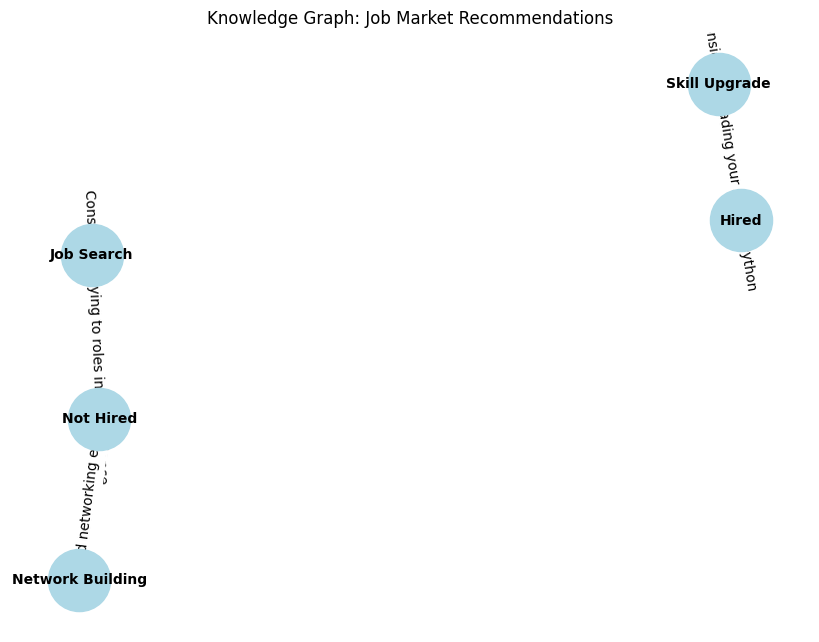

In [53]:
def visualize_graph():
    G = nx.Graph()

    # Add edges for recommendations based on predictions
    G.add_edge('Hired', 'Skill Upgrade', recommendation='Consider upgrading your skills in Python')
    G.add_edge('Not Hired', 'Job Search', recommendation='Consider applying to roles in Data Science')
    G.add_edge('Not Hired', 'Network Building', recommendation='Attend networking events')

    # Position the nodes using spring layout
    pos = nx.spring_layout(G)

    # Extract edge labels (recommendations)
    labels = nx.get_edge_attributes(G, 'recommendation')

    # Plot the graph
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, font_size=10, font_weight='bold')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.title("Knowledge Graph: Job Market Recommendations")
    plt.show()

# Call the function to display the graph
visualize_graph()